In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

%matplotlib inline

In [33]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Conv2D, MaxPooling2D, Flatten, Dropout
from keras.utils import to_categorical
import keras.backend as K
from keras.datasets import mnist

In [75]:
#load datasets 
(x_train, y_train), (x_test, y_test) = mnist.load_data()

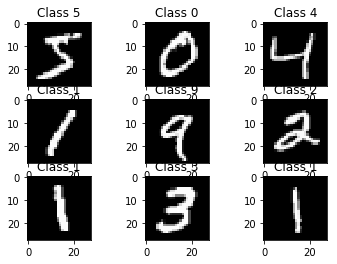

In [76]:
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(x_train[i], cmap='gray', interpolation='none')
    plt.title("Class {}".format(y_train[i]))

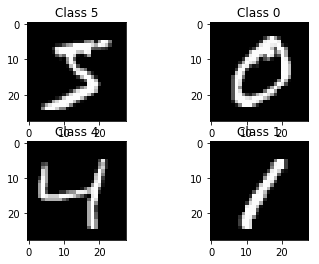

In [77]:
for i in range(4):
    plt.subplot(2,2,i+1)
    plt.imshow(x_train[i], cmap='gray', interpolation='none')
    plt.title("Class {}".format(y_train[i]))

In [78]:
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train/255
x_test = x_test/255

In [79]:
Y_train = to_categorical(y_train, 10)
Y_test = to_categorical(y_test, 10)

In [80]:
model = Sequential()
model.add(Dense(512,input_shape=(784,)))
model.add(Activation('relu'))
model.add(Dense(64))
model.add(Dropout(2))
model.add(Dense(10))
model.add(Activation('softmax'))

In [81]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [83]:
model.fit(x_train, Y_train, batch_size=400, epochs=10, validation_data=(x_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 5s 82us/step - loss: 0.3324 - acc: 0.9059 - val_loss: 0.1555 - val_acc: 0.9514
Epoch 2/10
60000/60000 [==============================] - 4s 71us/step - loss: 0.1248 - acc: 0.9634 - val_loss: 0.1037 - val_acc: 0.9682
Epoch 3/10
60000/60000 [==============================] - 5s 82us/step - loss: 0.0802 - acc: 0.9775 - val_loss: 0.0853 - val_acc: 0.9748
Epoch 4/10
60000/60000 [==============================] - 5s 83us/step - loss: 0.0568 - acc: 0.9829 - val_loss: 0.0714 - val_acc: 0.9778
Epoch 5/10
60000/60000 [==============================] - 5s 76us/step - loss: 0.0404 - acc: 0.9878 - val_loss: 0.0675 - val_acc: 0.9801
Epoch 6/10
60000/60000 [==============================] - 4s 74us/step - loss: 0.0290 - acc: 0.9915 - val_loss: 0.0617 - val_acc: 0.9812
Epoch 7/10
60000/60000 [==============================] - 5s 76us/step - loss: 0.0212 - acc: 0.9943 - val_loss: 0.0640 - val_acc

In [84]:
score = model.evaluate(x_test, Y_test, verbose=0)
print("Loss: {}".format(score[0]))
print("Accuracy: {}".format(score[1]))

Loss: 0.061337614256111554
Accuracy: 0.9822


In [98]:
predictions = model.predict_classes(x_test)

In [99]:
# correct = np.nonzero(predictions == y_test)[0]
# incorrect = np.nonzero(predictions != y_test)[0]

correct_indices = np.nonzero(predictions == y_test)[0]
incorrect_indices = np.nonzero(predictions != y_test)[0]

In [100]:
incorrect_indices.size

178

Correct Predictions
Incorrect Predictions


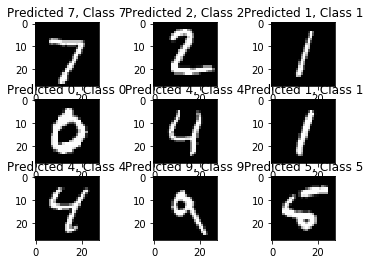

In [103]:
print("Correct Predictions")
plt.figure()
for i, correct in enumerate(correct_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(x_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predictions[correct], y_test[correct]))
    
print("Incorrect Predictions")
    
plt.figure()
for i, correct in enumerate(incorrect_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(x_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predictions[correct], y_test[correct]))